In [3]:
import numpy as np

In [13]:
import theano
import theano.tensor as T

In [19]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

## Автоматическое дифференцирование

In [31]:
scalar_x = T.dscalar('x')

In [32]:
scalar_y = scalar_x*scalar_x

In [33]:
diff_y = T.grad(scalar_y, scalar_x)

In [34]:
scalar_y_function = theano.function([scalar_x], scalar_y)

In [35]:
diff_y_function = theano.function([scalar_x], diff_y)

In [36]:
diff_y_function(3)

array(6.0)

In [37]:
x = np.linspace(-10,10)

In [39]:
y = np.float64([scalar_y_function(x_value) for x_value in x])

In [40]:
y_diff = np.float64([diff_y_function(x_value) for x_value in x])

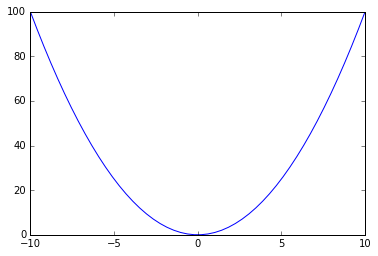

In [43]:
plt.plot(x,y)
plt.show()

## Разделяемые переменные

In [50]:
W = theano.shared(np.zeros((1, 1), dtype=theano.config.floatX))

In [51]:
W_value = W.get_value()
print(W_value.shape)
print(W_value)

(1, 1)
[[ 0.]]


In [54]:
W.set_value([[1]])

In [55]:
W_value = W.get_value()
print(W_value.shape)
print(W_value)

(1, 1)
[[ 1.]]


### Обновление разделяемых переменных

In [57]:
count = theano.shared(0)
new_count = count + 1
updates = {count: new_count}

In [58]:
f = theano.function([], count, updates=updates)

In [60]:
f()

array(1)

In [61]:
f()

array(2)

In [62]:
f()

array(3)